In [6]:
import os
import math

In [7]:
import ROOT as R
import numpy as np

Welcome to JupyROOT 6.22/00


In [8]:
R.gStyle.SetOptStat(0)
R.gStyle.SetGridColor(12)
R.gStyle.SetPadRightMargin(0.05)
R.gStyle.SetPadLeftMargin(0.15)
# R.gStyle.SetPadLeftMargin(0.1)

In [9]:
def draw(histos, config, out_file=None):
    size = (800, 800)
    if 'canvas' in config:
        size = config['canvas']
    C = R.TCanvas("canvas", "", size[0], size[1])
    C.SetGridx()
    C.SetGridy()
    R.SetOwnership(C, False)
    n = len(histos)
    leg = None
    if 'leg' in config:
        leg = R.TLegend(0.67,0.95-n*0.07, 0.95,0.95)
        leg.SetMargin(0.15)
        leg.SetTextSize(0.04)
        R.SetOwnership(leg, 0)
    h_axis = None
    h_toDraw = []
    for iH, h_ori in enumerate(histos):
        h = h_ori.Clone()
        if iH == 0:
            h_axis = h
        if 'rebin' in config:
            h.Rebin(config['rebin'])
#         h.Rebin(2)
        if 'norm' in config:
            h.Scale(config['norm'] / h.Integral())
        R.SetOwnership(h, 0)
        h.SetLineWidth(2)
        if 'style' in config:
            h.SetLineStyle(config['style'][iH])
        h.SetLineColor(config['color'][iH])
#         h.SetLineColor(1)
#         h.SetFillColor(config['color'][iH])
        if leg:
#             leg.AddEntry(h, config['leg'][iH], 'l')
            leg.AddEntry(h, config['leg'][iH], 'l').SetTextColor(config['color'][iH])
        h_toDraw.append(h)
    # Actually drawing
    h_axis.Draw('AXIS')
    h_axis.Draw('AXIG same')
    for iH, h in enumerate(h_toDraw):
        drawopt = 'hist'
        if 'drawopt' in config:
            drawopt = config['drawopt']
        drawopt += "same"
        h.Draw(drawopt)
    h_axis.Draw('AXIG same')
    if leg:
        leg.Draw()
        h_axis.GetYaxis().SetMaxDigits(4)
    if 'y' in config:
        h_axis.GetYaxis().SetRangeUser(*config['y'])
    if 'x' in config:
        h_axis.GetXaxis().SetRangeUser(*config['x'])
    if 'logY' in config:
        C.SetLogy(config['logY'])
    if 'logX' in config:
        C.SetLogx(config['logX'])
    C.RedrawAxis()
    C.Draw()
    if out_file:
        C.Print(out_file)

In [46]:
DIR_IN = '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/digi/'
FILES_IN = [os.path.join(DIR_IN, 'pgun_mu_1per10k_3ptFalse_v0_j{0:d}_tuple.root'.format(i)) for i in [1,2,3]]

In [47]:
files_in = [R.TFile(path) for path in FILES_IN]
trees = [file_in.Get('MyLCTuple') for file_in in files_in]

In [40]:
NHISTOS = 4
histos = [
    R.TH1F('h{0:d}'.format(i), ';E_{dep} [KeV];Hits (a.u.)', 200, 0, 200) for i in range(NHISTOS)
#     R.TH1F('h{0:d}'.format(i), ';t [ps];Tracker hits', 600, -300, 300) for i in range(NHISTOS)
#     R.TH1F('h{0:d}'.format(i), ';p_{T} [MeV];MARS particles', 300, 0, 3000) for i in range(NHISTOS)
]

In [193]:
for i in range(NHISTOS):
#     trees[i].Draw('1e3*thtim>>h{0:d}'.format(i), 'thori == 3', 'goff')
    trees[i].Draw('1e6*thedp>>h{0:d}'.format(i), 'thori == 6', 'goff')

In [146]:
sel_pdgs = [22, 11, 13, 2112]
for i, pdg in enumerate(sel_pdgs):
    trees[0].Draw("sqrt(mcmox*mcmox + mcmoy*mcmoy + mcmoz*mcmoz*0.0)*1e3>>h{0:d}".format(i), 'abs(mcpdg) == {0:d}'.format(sel_pdgs[i]), 'goff')
trees[0].Draw("sqrt(mcmox*mcmox + mcmoy*mcmoy + mcmoz*mcmoz*0.0)*1e3>>h{0:d}".format(NHISTOS-1), ' && '.join(['abs(mcpdg) != {0:d}'.format(pdg) for pdg in sel_pdgs]), 'goff')

-1

Error in <TTreeFormula::Compile>:  Bad numerical expression : "mcpdg"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {sqrt(mcmox*mcmox + mcmoy*mcmoy + mcmoz*mcmoz*0.0)*1e3,abs(mcpdg) == 22}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "mcpdg"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {sqrt(mcmox*mcmox + mcmoy*mcmoy + mcmoz*mcmoz*0.0)*1e3,abs(mcpdg) == 11}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "mcpdg"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {sqrt(mcmox*mcmox + mcmoy*mcmoy + mcmoz*mcmoz*0.0)*1e3,abs(mcpdg) == 13}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "mcpdg"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {sqrt(mcmox*mcmox + mcmoy*mcmoy + mcmoz*mcmoz*0.0)*1e3,abs(mcpdg) == 2112}
Error in <TTreeFormula::Compile>:  Bad numerical expression : "mcpdg"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {sqrt(mcmox*mcmo

In [151]:
trees[1].Draw("1e6*stedp>>h0", 'stori == 1', "goff")
trees[1].Draw("1e6*stedp>>h1", 'stori > 1', "goff")
trees[0].Draw("1e6*stedp>>h2", 'stori == 1', "goff")
trees[0].Draw("1e6*stedp>>h3", 'stori > 1', "goff")

6394600

In [43]:
sel = '&& sqrt(thpox*thpox + thpoy*thpoy) < 40'
print(trees[0].Draw("1e6*thedp>>h0", 'thori == 1'+sel, "goff"))
print(trees[1].Draw("1e6*thedp>>h1", 'thori == 1'+sel, "goff"))
print(trees[0].Draw("1e6*thedp>>h2", 'thori == 2'+sel, "goff"))
print(trees[1].Draw("1e6*thedp>>h3", 'thori == 2'+sel, "goff"))

17188
136725
2585
119676


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_11_11_tracking/plots/hit_edep_vxde_inner_p10.pdf has been created


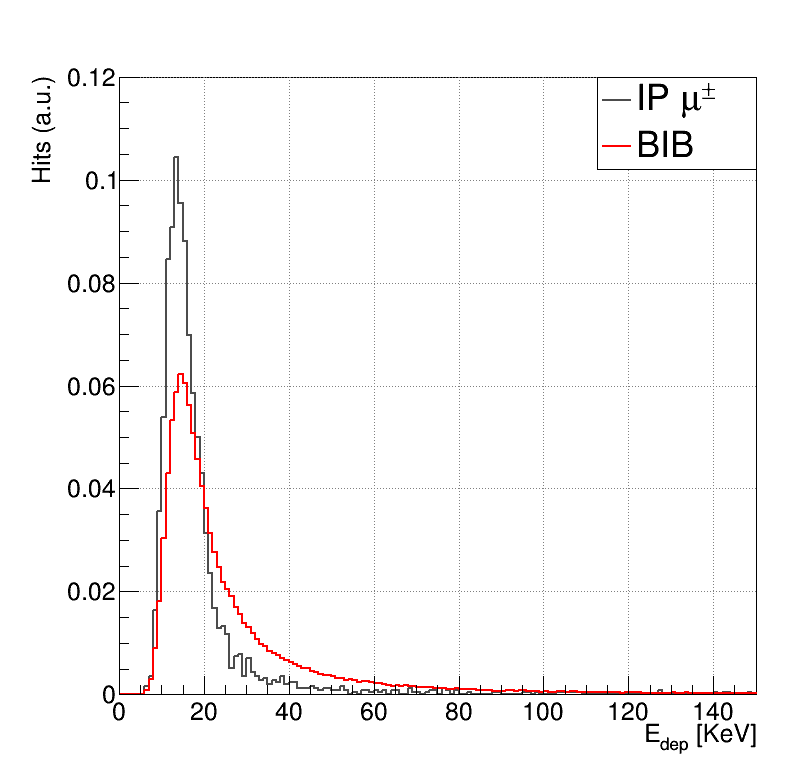

In [44]:
DIR_OUT = '~/pdc/muoncdata/users/bartosik/clic/studies/2020_11_11_tracking/plots'
draw(histos[2:], {'color': [12, 2, R.kAzure+2, R.kRed, R.kOrange+6, R.kAzure+1, 14],
              'leg': ['IP #mu^{#pm}', 'BIB'],
#               'y': (0, 8e3),
#               'x': (-300, 300),
              'y': (0, 0.12),
              'x': (0, 150),
              'logY': False,
              'logX': False,
              'norm': 1.0,
#               'rebin': 4,
#              })
             }, os.path.join(DIR_OUT, 'hit_edep_vxde_inner_p10.pdf'))

### SimHit time

In [51]:
DIR_IN = '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/digi/'
# FILES_IN = [os.path.join(DIR_IN, 'pgun_mu_1per10k_3pNone_v0_j{0:d}_tuple.root'.format(i)) for i in [1,2]]
FILES_IN = [os.path.join(DIR_IN, 'pgun_mu_1per10k_3pNone_v0_j1_tuple.root'),
            os.path.join(DIR_IN, 'pgun_mu_1per10k_3pFalse_v0_j2_tuple.root')]
files_in = [R.TFile(path) for path in FILES_IN]
trees = [file_in.Get('MyLCTuple') for file_in in files_in]

#### Raw time

In [61]:
NHISTOS = 2
histos = [R.TH1F('h{0:d}'.format(i), ';Hit time [ps];Endcap hits', 450, 0, 13000) for i in range(NHISTOS)]
for i in range(NHISTOS):
    trees[i].Draw('1e3*sttim>>h{0:d}'.format(i), 'stori % 2 == 0', 'goff')

Warning in <TFile::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots/simhit_time_raw_endcap.png has been created


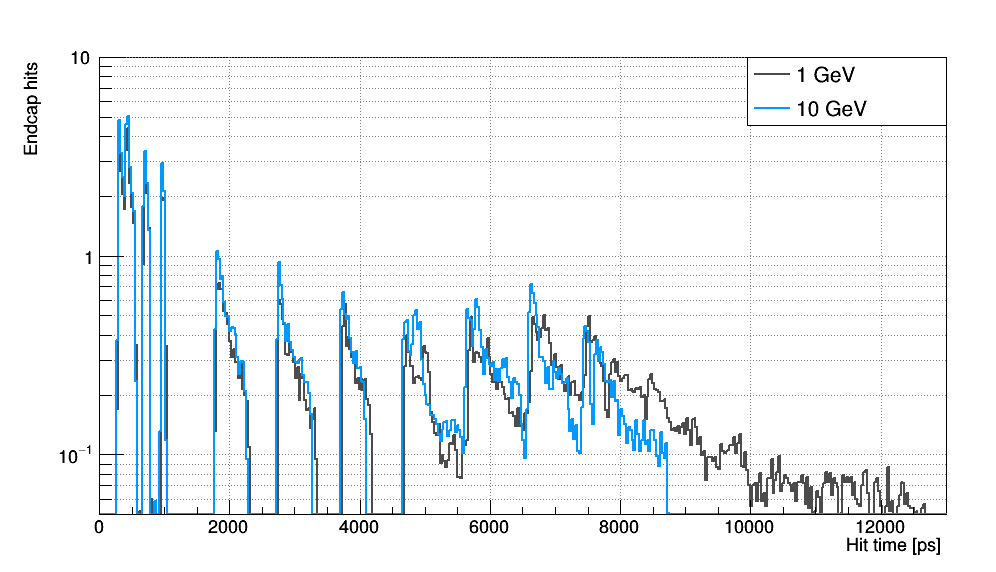

In [62]:
DIR_OUT = '~/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots'
draw(histos, {'color': [12, R.kAzure+7, R.kTeal+2],
              'leg': ['1 GeV', '10 GeV'],
              'y': (5e-2, 10),
              'norm': 100,
              'logY': True
#              }, None)
             }, os.path.join(DIR_OUT, 'simhit_time_raw_endcap.png'))

#### Time difference

In [106]:
storis = [1,3,5]
# storis = [2,4,6]
histos = [R.TH1F('h{0:d}'.format(i), ';Hit time [ps];Hits', 200, 0,1400) for i in range(len(storis))]
for i, stori in enumerate(storis):
    trees[0].Draw('1e3*(sttim - sqrt(stpox*stpox + stpoy*stpoy + stpoz*stpoz)/2.998e2)>>h{0:d}'.format(i), 'stori == {0:d}'.format(stori), 'goff')

Warning in <TFile::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots/simhit_time_t0_barrel.png has been created


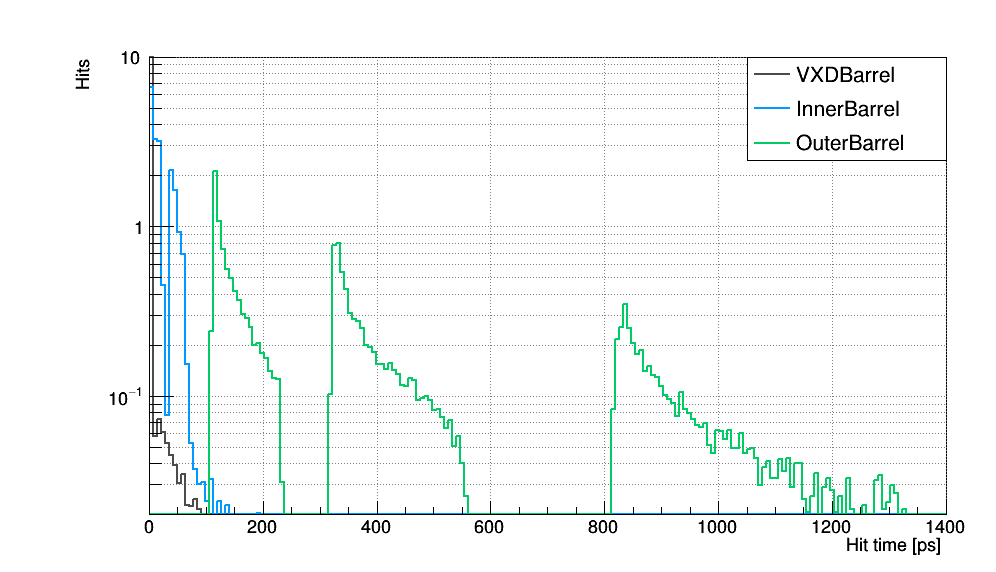

In [111]:
DIR_OUT = '~/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots'
draw(histos, {'color': [12, R.kAzure+7, R.kTeal+2],
              'leg': ['VXDBarrel', 'InnerBarrel', 'OuterBarrel'],
#               'leg': ['VXDEndcap', 'InnerEndcap', 'OuterEndcap'],
              'y': (2e-2, 10),
              'norm': 20,
              'logY': True
             }, os.path.join(DIR_OUT, 'simhit_time_t0_barrel.png'))

#### Time difference + resolution

In [47]:
DIR_IN = '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/digi/'
FILES_IN = [os.path.join(DIR_IN, 'pgun_mu_1per10k_3pFalse_v0_j{0:d}_trkTuple.root'.format(i)) for i in [1]]
files_in = [R.TFile(path) for path in FILES_IN]
trees = [file_in.Get('MyLCTuple') for file_in in files_in]

In [48]:
# storis = [1,3,5]
storis = [2,4,6]
histos = [R.TH1F('h{0:d}'.format(i), ';Hit time [ps];Hits [a.u.]', 50, 0, 200) for i in range(len(storis))]
for i, stori in enumerate(storis):
    trees[0].Draw('1e3*(thtim)>>h{0:d}'.format(i), 'thori == {0:d}'.format(stori), 'goff')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots/rechit_time_t0_endcap.png has been created


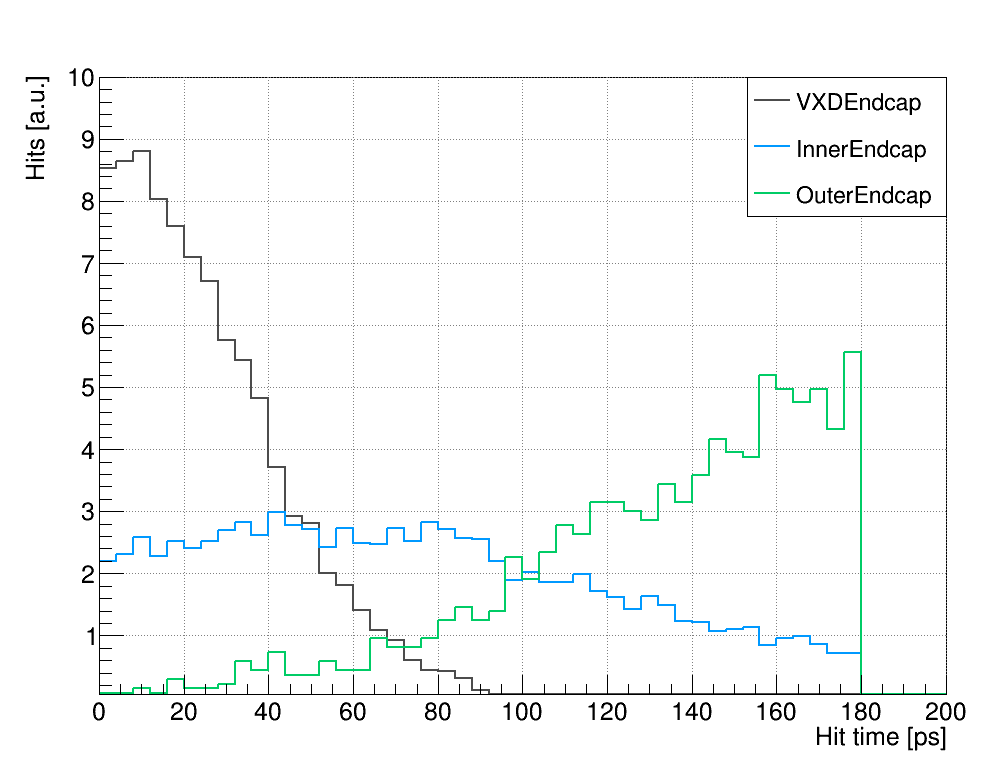

In [49]:
DIR_OUT = '~/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots'
draw(histos, {'color': [12, R.kAzure+7, R.kTeal+2],
#               'leg': ['VXDBarrel', 'InnerBarrel', 'OuterBarrel'],
              'leg': ['VXDEndcap', 'InnerEndcap', 'OuterEndcap'],
              'y': (5e-2, 10),
              'norm': 90,
              'logY': False
#              }, None)
             }, os.path.join(DIR_OUT, 'rechit_time_t0_endcap.png'))

### SimHit raw time

In [61]:
DIR_IN = '/Users/nbartosi/cernbox/work/mu_collider/data/'
FILE_IN = os.path.join(DIR_IN, 'bib_trk_5nsWindow_tuple.root')
file_in = R.TFile(FILE_IN)
tree = file_in.Get('MyLCTuple')

1 0 2074873
1 1 220965
1 2 169923
1 3 167722


Warning in <TFile::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


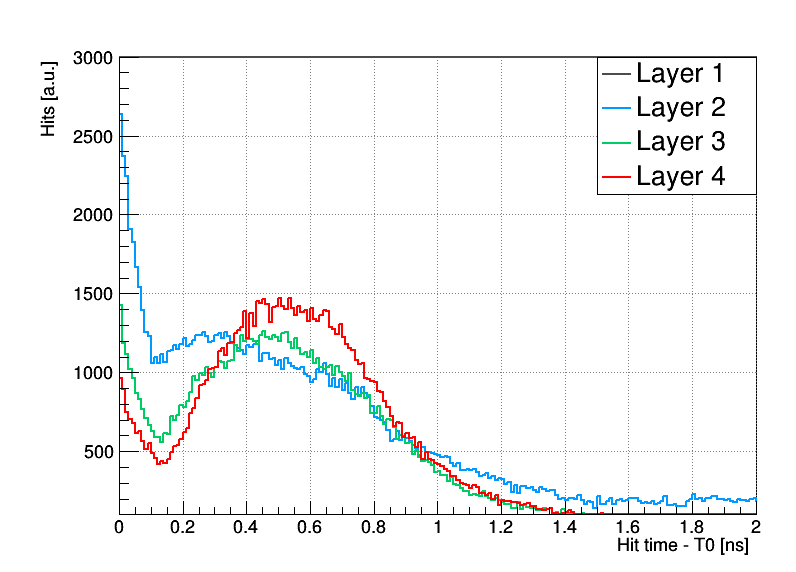

In [63]:
DIR_OUT = '~/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots'
nLayers = {
    1: 4,
#     2: 4,
#     3: 3,
#     4: 7,
#     5: 3,
#     6: 4
}
for ori, nL in nLayers.items():
    layers = range(nL)
    histos = [R.TH1F('h{0:d}'.format(i), ';Hit time - T0 [ns];Hits [a.u.]', 500, 0, 5) for i in layers]
    for layer in layers:
        h = histos[layer]
        if layer <= 3:
            nev = tree.Draw('sttim - sqrt(stpox*stpox + stpoy*stpoy + stpoz*stpoz)/2.998e2 >> h{0:d}'.format(layer), 'stori == {0:d} && int((int(stci0/128)%64)/2) == {1:d}'.format(ori, layer), 'goff')
        else:
            nev = tree.Draw('sttim - sqrt(stpox*stpox + stpoy*stpoy + stpoz*stpoz)/2.998e2 >> h{0:d}'.format(layer), 'stori == {0:d} && (int(stci0/128)%64) >= {1:d}'.format(ori, layer), 'goff')
        print(ori, layer, nev)
    draw(histos[:5], {'color': [12, R.kAzure+7, R.kTeal+2, 2, R.kOrange+6],
                      'leg': ['Layer {0:d}'.format(l+1) for l in layers[0:4]] + ['Layers 4-7'],
#                       'norm': 1.0,
#                       'logY': True,
                      'x': (0, 2),
                      'y': (100, 3e3),
                     }, None)
#                  }, os.path.join(DIR_OUT, 'simhit_time_t0_ori_{0:d}_noNorm.png'.format(ori)))

### SimHit raw time and MCP properties

In [61]:
DIR_IN = '/Users/nbartosi/cernbox/work/mu_collider/data/'
FILE_IN = os.path.join(DIR_IN, 'bib_trk_hits_mcp_m1ns_p10mus.root')
file_in = R.TFile(FILE_IN)
tree = file_in.Get('tree')

0 0 2164198
0 1 252027
0 2 200541
0 3 202981


Warning in <TFile::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TFile::Append>: Replacing ex

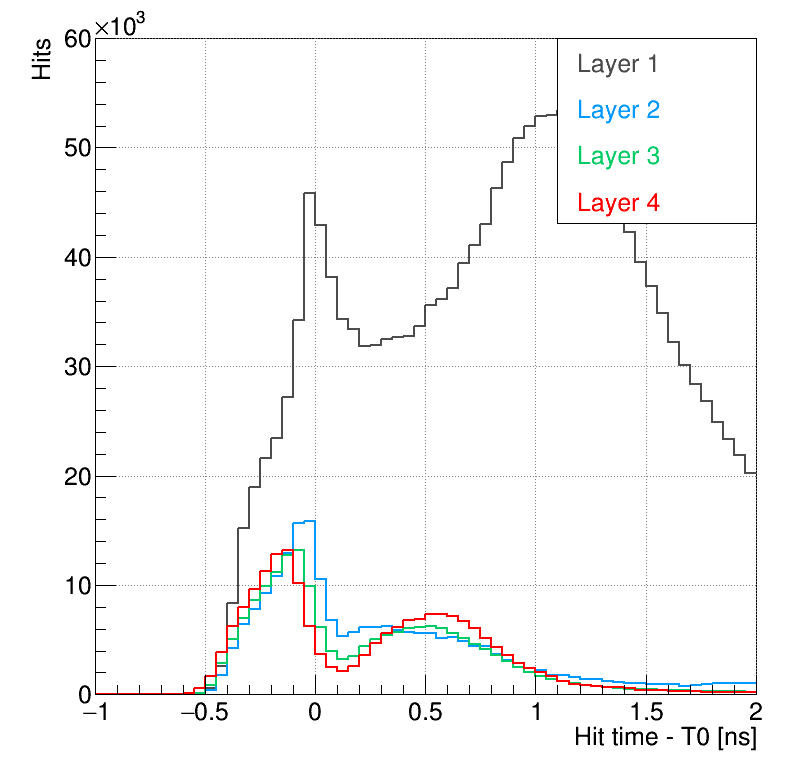

In [195]:
DIR_OUT = '~/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots'
nLayers = {
    0: 4,
#     1: 4,
#     2: 3,
#     3: 7,
#     4: 3,
#     5: 4,
}
selections = {
    'all': 'mcp_bib_niters >= 0',
#     'electrons_dir': 'mcp_bib_niters == 0 && abs(mcp_pdg) == 11',
#     'electrons_sec': 'mcp_bib_niters > 0 && abs(mcp_pdg) == 11',
#     'photons': 'mcp_pdg == 22'
}
nLayersMax = 5
for ori, nL in nLayers.items():
    layers = range(nL)
    legs = ['Layer {0:d}'.format(l+1) for l in layers[:nLayersMax-1]]
    if len(layers) > nLayersMax:
        legs.append('Layers {0:d}-{1:d}'.format(nLayersMax, len(layers)))
    histos = [R.TH1F('h{0:d}'.format(i), ';Hit time - T0 [ns];Hits', 300, -5, 10) for i in layers[:nLayersMax]]
    for name, sel in selections.items():
        for layer in layers[:nLayersMax]:
            h = histos[layer]
            sel_layer = 'int(layer/2) == {0:d}'.format(layer)
            if layer >= nLayersMax-1:
                sel_layer = sel_layer.replace('==', '>=')
            nev = tree.Draw('time - time0 >> h{0:d}'.format(layer), 'col_id == {0:d} && {1:s} && {2:s}'.format(ori, sel_layer, sel), 'goff')
            print(ori, layer, nev)
        draw(histos, {'color': [12, R.kAzure+7, R.kTeal+2, 2, R.kOrange+6],
                          'leg': legs,
    #                       'norm': 1.0,
                          'logY': False,
                          'x': (-1, 7),
                          'y': (0, 60e3),
#                          }, None)
                         }, os.path.join(DIR_OUT, 'simhit_time_t0_ori_{0:d}_{1:s}_zoom.png'.format(ori, name)))

### SimHit multiplicity vs Layer for different time windows

In [150]:
DIR_IN = '/Users/nbartosi/cernbox/work/mu_collider/data/'
FILE_IN = os.path.join(DIR_IN, 'bib_trk_hits_mcp_m1ns_p10mus.root')
file_in = R.TFile(FILE_IN)
tree = file_in.Get('tree')

2 0 604008
2 1 1802881
2 2 1964514
2 3 2112101
3 0 292635
3 1 541262
3 2 702097
3 3 1517209
4 0 272114
4 1 1426197
4 2 1740373
4 3 2701593
5 0 274607
5 1 503252
5 2 705642
5 3 1712529


Warning in <TFile::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots/simhit_mult_ori_2.png has been created
Warning in <TFile::Append>: Replacing existing TH1: h0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing T

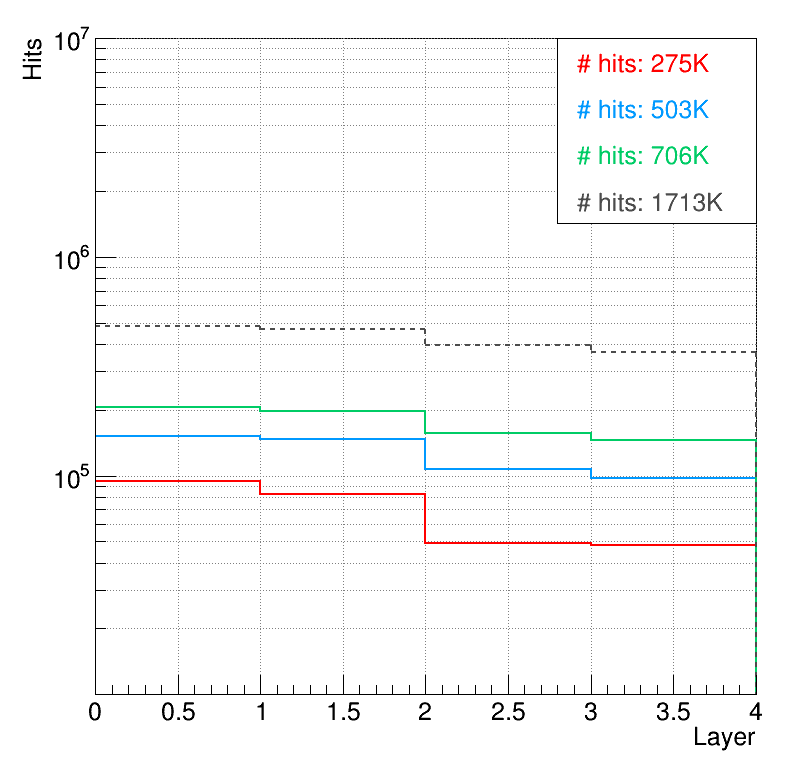

In [193]:
DIR_OUT = '~/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots'
nLayers = {
#     0: 8,
#     1: 8,
    2: 3,
    3: 7,
    4: 3,
    5: 4,
}
selections = ['(time - time0) < {0:s}'.format(thr) for thr in ['0.18', '1.0', '10.0', '10e3']]
for ori, nL in nLayers.items():
    legs = []
    histos = [R.TH1F('h{0:d}'.format(i), ';Layer;Hits', 10, 0, 10) for i in range(len(selections))]
    for iSel, sel in enumerate(selections):
        h = histos[iSel]
        nev = tree.Draw('layer >> h{0:d}'.format(iSel), 'col_id == {0:d} && (time - time0) > -0.18 && {1:s}'.format(ori, sel), 'goff')
#         print(sel)
#         nev = tree.Draw('layer >> h{0:d}'.format(iSel), sel + ' && (time - time0) > -0.18', 'goff')
        legs.append('# hits: {0:d}K'.format(round(nev/1000)))
        print(ori, iSel, nev)
    draw(histos, {'color': [2, R.kAzure+7, R.kTeal+2, 12],
                  'style': [1, 1, 1, 7],
                  'leg': legs,
#                   'norm': 1.0,
                  'logY': True,
                  'x': (0, nL),
                  'y': (1e4, 1e7),
#                  }, None)
                 }, os.path.join(DIR_OUT, 'simhit_mult_ori_{0:d}.png'.format(ori)))

In [180]:
print(selections)

['((time - time0) < 0.18 || (col_id <= 1 && (time - time0) < 0.09)', '((time - time0) < 1.0)', '((time - time0) < 10.0)', '((time - time0) < 10e3)']


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots/rechit_time_t0_endcap.png has been created


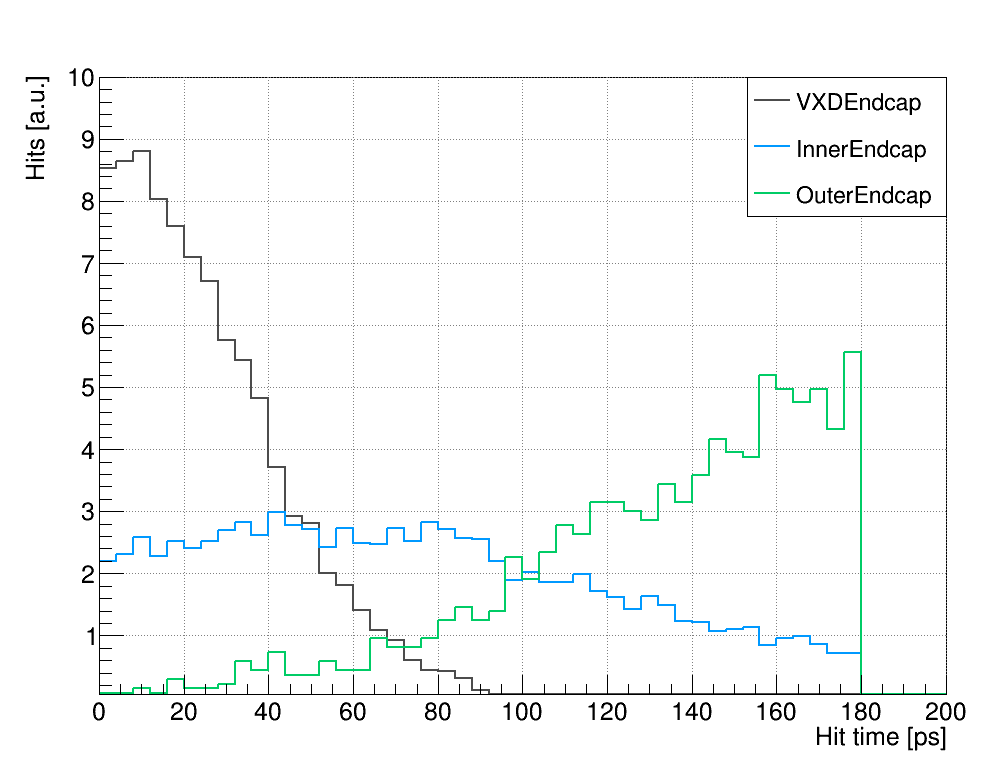

In [49]:
DIR_OUT = '~/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots'
draw(histos, {'color': [12, R.kAzure+7, R.kTeal+2],
#               'leg': ['VXDBarrel', 'InnerBarrel', 'OuterBarrel'],
              'leg': ['VXDEndcap', 'InnerEndcap', 'OuterEndcap'],
              'y': (5e-2, 5),
              'norm': 90,
              'logY': False
#              }, None)
             }, os.path.join(DIR_OUT, 'rechit_time_t0_endcap.png'))

### SimHit deposited energy

In [158]:
NHISTOS = 4
histos = [R.TH1F('h{0:d}'.format(i), ';E_{dep} [KeV];Hits (a.u.)', 200, 0, 200) for i in range(NHISTOS)]
print(trees[0].Draw("1e6*stedp>>h0", 'stori == 1 && abs(mcpdg[stmcp]) == 13', "goff"))
print(trees[0].Draw("1e6*stedp>>h1", 'stori > 1 && abs(mcpdg[stmcp]) == 13', "goff"))
print(trees[0].Draw("1e6*stedp>>h2", 'stori == 1 && abs(mcpdg[stmcp]) == 211', "goff"))
print(trees[0].Draw("1e6*stedp>>h3", 'stori > 1 && abs(mcpdg[stmcp]) == 211', "goff"))

8625
37596
11386
91661


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_04_21_tracker/plots/hit_e_bkg_mu_pi.png has been created


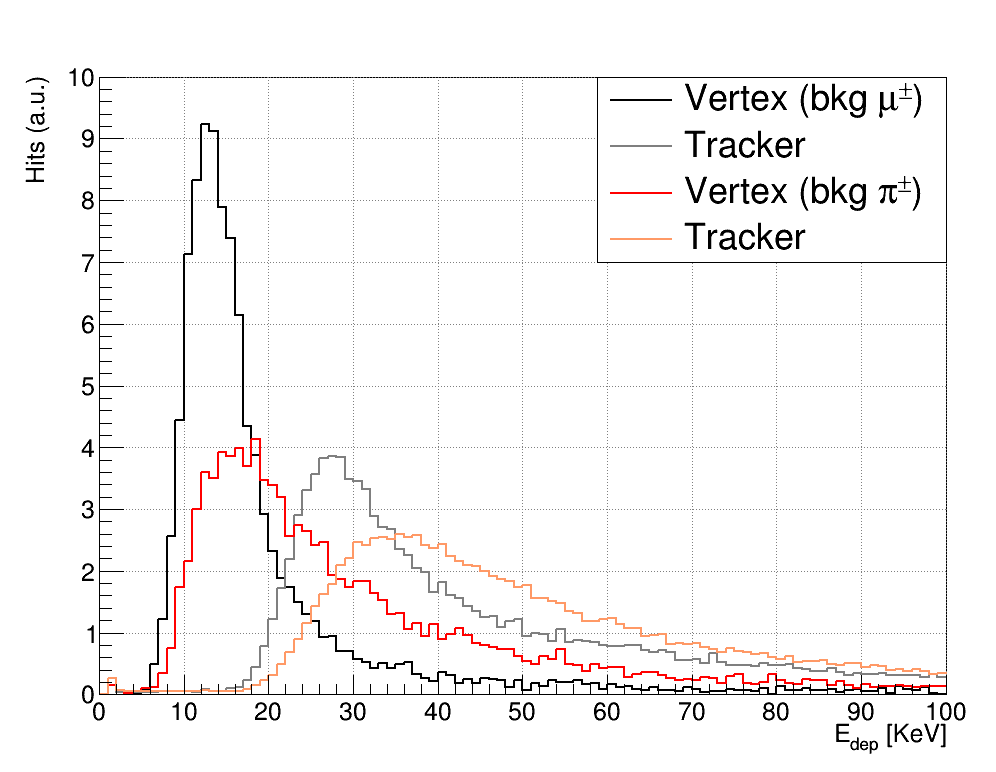

In [160]:
DIR_OUT = '~/pdc/muoncdata/users/bartosik/clic/studies/2020_04_21_tracker/plots'
draw(histos, {'color': [1, 14, R.kRed, R.kOrange+6, R.kAzure+2, R.kAzure+1],  
#               'leg': ['Vertex (bkg #mu)', 'Tracker', 'Vertex (bkg e^{#pm})', 'Tracker', 'Vertex (bkg #gamma)', 'Tracker'],
              'leg': ['Vertex (bkg #mu^{#pm})', 'Tracker', 'Vertex (bkg #pi^{#pm})', 'Tracker'],
#               'leg': ['Vertex (bkg e^{#pm})', 'Tracker', 'Vertex (bkg #gamma)', 'Tracker'],
#               'leg': ['Vertex (IP #mu)', 'Tracker', 'Vertex (bkg all)', 'Tracker'],
              'y': (0, 10),
              'norm': 100
             }, os.path.join(DIR_OUT, 'hit_e_bkg_mu_pi.png'))

In [66]:
trees[0].Print()

******************************************************************************
*Tree    :MyLCTuple : columnwise ntuple with LCIO data                       *
*Entries :     1408 : Total =       232177060 bytes  File  Size =  139899788 *
*        :          : Tree compression factor =   1.66                       *
******************************************************************************
*Br    0 :evevt     : evevt/I                                                *
*Entries :     1408 : Total  Size=       6502 bytes  File Size  =       2678 *
*Baskets :        5 : Basket Size=      21603 bytes  Compression=   2.25     *
*............................................................................*
*Br    1 :evrun     : evrun/I                                                *
*Entries :     1408 : Total  Size=       6502 bytes  File Size  =        535 *
*Baskets :        5 : Basket Size=      21603 bytes  Compression=  11.25     *
*...................................................

In [58]:
DIR_IN = '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_10_15_geometry/'
file_in = R.TFile(os.path.join(DIR_IN, 'digi/pgun_mu_1per50k_8pt_mod4False_v0.root'))
# RNG = {'x': 600, 'y': 150} # VTX
# RNG = {'x': 600, 'y': 450} # VTX + IB
RNG = {'x': 2300, 'y': 1500} # Full tracker

In [59]:
h = R.TH2I('h0', ';Z [mm];R [mm]', 10*RNG['x'],0,RNG['x'], 10*RNG['y'],0,RNG['y'])

In [60]:
tree = file_in.Get('MyLCTuple')

In [67]:
tree.Draw("sqrt(stpoy*stpoy + stpox*stpox):abs(stpoz) >> h0", "stori >= 0", "", 50000, 250000)

778966

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /Users/nbartosi/cernbox/work/mu_collider/data/plots/trk_layout_mod4_clean.png has been created


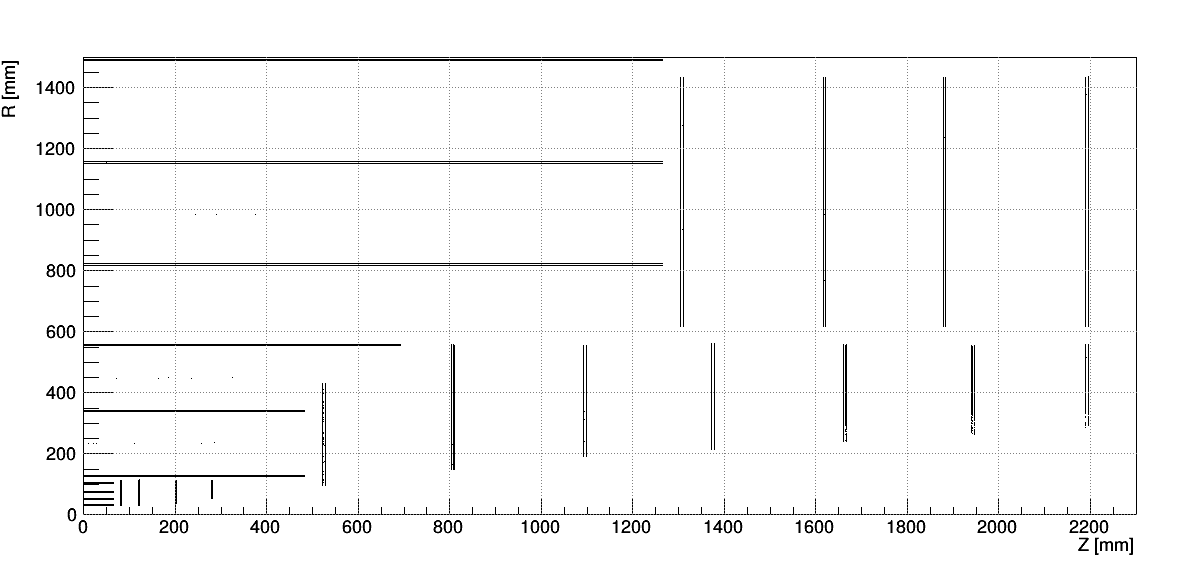

In [68]:
C = R.TCanvas('canvas', '', 1200, 600)
C.SetLeftMargin(0.07)
C.SetGrid(1,1)
h.GetYaxis().SetTitleOffset(1.1)
h.Draw('P')
# Drawing lines
# angles = [10, 15, 22]
# angles = [10, 35]
# angles = range(10, 95, 5)
angles = []
for a in angles:
    # Calculating the line endpoints
    L = RNG['x']
    y = L*math.sin(math.radians(a))
    x = L*math.cos(math.radians(a))
    corr = max(x/RNG['x'], y/RNG['y'])
    x /= corr
    y /= corr
    # Drawing
    l = R.TLine(0,0, x,y)
    R.SetOwnership(l, False)
    l.SetLineColor(2)
    l.Draw('same')
C.Draw()
DIR_OUT = '/Users/nbartosi/cernbox/work/mu_collider/data/plots/'
C.SaveAs(os.path.join(DIR_OUT, 'vtx_layout_mod4_angles.png'))

### BIB input MCParticle properties

In [76]:
file_in.Close()

In [5]:
DIR_IN = '/Users/nbartosi/cernbox/work/mu_collider/data/mars_fluka_comparison/bib_mcp/'
# fname, FILE_IN = 'mars15', os.path.join(DIR_IN, 'mars15/mumi-1e3x500-26m-lowth-excl_t25ns_n150MeV.root')
# fname, FILE_IN = 'fluka', os.path.join(DIR_IN, 'fluka/part_new_sigma25_perNazar_t25ns_n150MeV.root')
fname, FILE_IN = 'mars15', os.path.join(DIR_IN, '../bib_trk_hits_mcp_m1ns_p10mus.root')
file_in = R.TFile(FILE_IN)
tree = file_in.Get('MyLCTuple')

NameError: name 'os' is not defined

In [73]:
pdgs = [2112, 22, 11]
histos = [R.TH1F('h{0:d}'.format(i), ';Momentum [GeV];BIB Particles', 200, 0, 1) for i in range(len(pdgs))]
for i, pdg in enumerate(pdgs):
#     nev = tree.Draw('sqrt(mcmox*mcmox + mcmoy*mcmoy + mcmoz*mcmoz)>>h{0:d}'.format(i), 'abs(mcpdg) == {0:d} && abs(mcmoz/sqrt(mcmox*mcmox + mcmoy*mcmoy) * (1500 - sqrt(mcvtx*mcvtx + mcvty*mcvty))+ mcvtz) < 1300'.format(pdg), 'goff')
    nev = tree.Draw('sqrt(mcmox*mcmox + mcmoy*mcmoy+mcmoz*mcmoz)>>h{0:d}'.format(i), 'abs(mcpdg) == {0:d}'.format(pdg), 'goff')
    print(pdg, nev)

2112 814315
22 34019541
11 2110763


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2021_05_02_bib_sim/plots/mcp_p_sel_fluka.png has been created


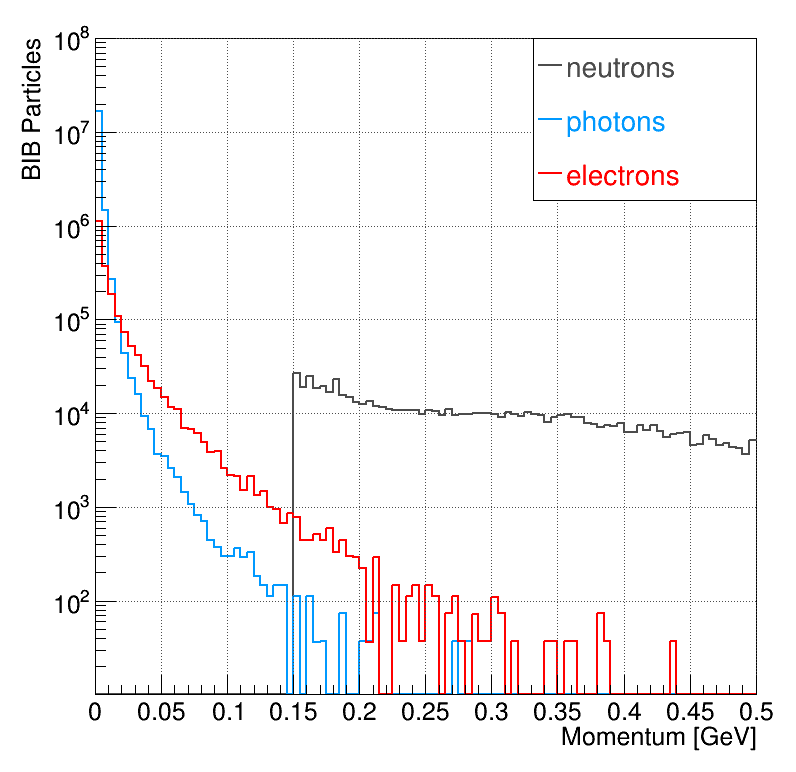

In [42]:
R.gStyle.SetPadTopMargin(0.05)
R.gStyle.SetPadLeftMargin(0.12)
DIR_OUT = '~/pdc/muoncdata/users/bartosik/clic/studies/2021_05_02_bib_sim/plots'
draw(histos, {'color': [12, R.kAzure+7, 2],
              'leg': ['neutrons', 'photons', 'electrons'],
              'y': (1e1, 1e8),
              'x': (0, 0.5),
#               'norm': 90,
              'logY': True
             }, None)
#              }, os.path.join(DIR_OUT, 'mcp_p_sel_{0:s}.png'.format(fname)))

In [40]:
x_neut = np.array([0.01500, 0.02500, 0.03500, 0.04500, 0.05500, 0.06500, 0.07500, 0.08500, 0.09500, 0.10500, 0.11500, 0.12500, 0.13500, 0.14500, 0.15500, 0.16500, 0.17500, 0.18500, 0.19500, 0.20500, 0.21500, 0.22500, 0.23500, 0.24500, 0.25500, 0.26500, 0.27500, 0.28500, 0.29500, 0.30500, 0.31500, 0.32500, 0.33500, 0.34500, 0.35500, 0.36500, 0.37500, 0.38500, 0.39500, 0.40500, 0.41500, 0.42500, 0.43500, 0.44500, 0.45500, 0.46500, 0.47500, 0.48500, 0.49500, 0.50500, 0.51500, 0.52500, 0.53500, 0.54500, 0.55500, 0.56500, 0.57500, 0.58500, 0.59500, 0.60500, 0.61500, 0.62500, 0.63500, 0.64500, 0.65500, 0.66500, 0.67500, 0.68500, 0.69500, 0.70500, 0.71500, 0.72500, 0.73500, 0.74500, 0.75500, 0.76500, 0.77500, 0.78500, 0.79500, 0.80500, 0.81500, 0.82500, 0.83500, 0.84500, 0.85500, 0.86500, 0.87500, 0.88500, 0.89500, 0.90500, 0.91500, 0.92500, 0.93500, 0.94500, 0.95500, 0.96500, 0.97500, 0.98500, 0.99500, 1.00500], dtype=np.float32)
y_neut = np.array([1.79165, 2.07100, 2.04791, 1.90999, 1.72131, 1.56871, 1.43690, 1.31918, 1.21364, 1.12715, 1.05648, 0.99869, 0.95149, 0.91182, 0.87900, 0.85258, 0.83159, 0.81403, 0.79841, 0.78385, 0.77057, 0.75854, 0.74761, 0.73765, 0.72846, 0.71957, 0.71136, 0.70420, 0.69836, 0.69408, 0.69135, 0.68951, 0.68793, 0.68612, 0.68375, 0.68116, 0.67849, 0.67583, 0.67325, 0.67080, 0.66855, 0.66648, 0.66456, 0.66276, 0.66107, 0.65947, 0.65793, 0.65645, 0.65501, 0.65361, 0.65222, 0.65084, 0.64947, 0.64809, 0.64670, 0.64529, 0.64387, 0.64242, 0.64094, 0.63943, 0.63788, 0.63630, 0.63468, 0.63302, 0.63132, 0.62957, 0.62778, 0.62594, 0.62406, 0.62214, 0.62017, 0.61815, 0.61609, 0.61398, 0.61182, 0.60963, 0.60738, 0.60510, 0.60277, 0.60040, 0.59801, 0.59586, 0.59416, 0.59317, 0.59218, 0.59120, 0.59021, 0.58923, 0.58825, 0.58727, 0.58630, 0.58540, 0.58452, 0.58364, 0.58277, 0.58189, 0.58102, 0.58015, 0.57928, 0.57838], dtype=np.float32)
zeros = np.zeros(len(x_neut), dtype=np.float32)
g_neut = R.TGraphErrors(len(x_neut), x_neut, y_neut, zeros, zeros)

In [41]:
x_neut_low = [2.0000000E-02, 1.9640300E-02, 1.9155400E-02, 1.8682500E-02, 1.8221200E-02, 1.7771300E-02, 1.7332500E-02, 1.6904600E-02, 1.6487200E-02, 1.6080100E-02, 1.5683100E-02, 1.5295900E-02, 1.4918300E-02, 1.4549900E-02, 1.4190700E-02, 1.3840300E-02, 1.3498600E-02, 1.3165300E-02, 1.2840200E-02, 1.2523200E-02, 1.2214000E-02, 1.1912500E-02, 1.1618300E-02, 1.1331500E-02, 1.1051700E-02, 1.0778800E-02, 1.0512700E-02, 1.0253200E-02, 9.9999998E-03, 9.7530996E-03, 9.5122904E-03, 9.2774397E-03, 9.0483697E-03, 8.8249696E-03, 8.6070802E-03, 8.3945701E-03, 8.1873098E-03, 7.9851598E-03, 7.7880099E-03, 7.5957198E-03, 7.4081798E-03, 7.2252699E-03, 7.0468802E-03, 6.8728901E-03, 6.7031998E-03, 6.6475999E-03, 6.5923799E-03, 6.5377001E-03, 6.3762800E-03, 6.2188501E-03, 6.0653100E-03, 5.9155500E-03, 5.7695000E-03, 5.4881200E-03, 5.2204598E-03, 4.9658502E-03, 4.8432499E-03, 4.7236700E-03, 4.6070400E-03, 4.4932901E-03, 4.2741499E-03, 4.0656999E-03, 3.8674099E-03, 3.6787901E-03, 3.4993801E-03, 3.3287101E-03, 3.2465300E-03, 3.1663701E-03, 3.0881900E-03, 3.0119400E-03, 2.8650500E-03, 2.7253199E-03, 2.5923999E-03, 2.4659701E-03, 2.4251300E-03, 2.3852000E-03, 2.3652499E-03, 2.3457000E-03, 2.3068599E-03, 2.2688799E-03, 2.2313001E-03, 2.1224800E-03, 2.0189700E-03, 1.9691200E-03, 1.9205000E-03, 1.8730800E-03, 1.8268300E-03, 1.7377400E-03, 1.6529900E-03, 1.6121800E-03, 1.5723699E-03, 1.5335500E-03, 1.4956900E-03, 1.4227401E-03, 1.3533500E-03, 1.2873500E-03, 1.2245600E-03, 1.1943300E-03, 1.1648400E-03, 1.1080300E-03, 1.0539900E-03, 1.0025901E-03, 9.7783399E-04, 9.6163998E-04, 9.5369201E-04, 9.0717903E-04, 8.6293602E-04, 8.2085002E-04, 7.8081700E-04, 7.4273598E-04, 7.0651202E-04, 6.7205500E-04, 6.3927902E-04, 6.0810102E-04, 5.7844300E-04, 5.5023201E-04, 5.3664698E-04, 5.2339700E-04, 5.1047403E-04, 4.9787102E-04, 4.7358900E-04, 4.5049199E-04, 4.2852099E-04, 4.0762199E-04, 3.8774201E-04, 3.6883200E-04, 3.5084400E-04, 3.3373301E-04, 3.1745600E-04, 3.0961799E-04, 3.0197401E-04, 2.9451799E-04, 2.8724599E-04, 2.8015400E-04, 2.7323700E-04, 2.5991100E-04, 2.4723500E-04, 2.3517800E-04, 2.2370800E-04, 2.1279699E-04, 2.0241900E-04, 1.9254700E-04, 1.8315599E-04, 1.7422400E-04, 1.6992200E-04, 1.6572700E-04, 1.6163501E-04, 1.5764400E-04, 1.4995600E-04, 1.4264201E-04, 1.3568600E-04, 1.2906799E-04, 1.2277300E-04, 1.1678600E-04, 1.1109000E-04, 9.8036500E-05, 8.6516899E-05, 7.6350902E-05, 6.7379500E-05, 6.2510902E-05, 5.9462200E-05, 5.6562199E-05, 5.2475199E-05, 4.6309200E-05, 4.0867701E-05, 3.6065601E-05, 3.5175199E-05, 3.4306700E-05, 3.1827800E-05, 2.8087899E-05, 2.6058400E-05, 2.4787500E-05, 2.4175501E-05, 2.3578599E-05, 2.1874899E-05, 2.1334799E-05, 1.9304500E-05, 1.7036200E-05, 1.5034400E-05, 1.3267800E-05, 1.1708800E-05, 1.0333000E-05, 9.1188203E-06, 8.0473301E-06, 7.1017398E-06, 6.2672698E-06, 5.5308401E-06, 5.0045101E-06, 4.5282700E-06, 4.3074201E-06, 4.0973500E-06, 3.7074401E-06, 3.3546301E-06, 3.0353899E-06, 2.8634900E-06, 2.7465401E-06, 2.6125899E-06, 2.4851699E-06, 2.2486699E-06, 2.0346799E-06, 1.8410600E-06, 1.6658601E-06, 1.5846100E-06, 1.5073300E-06, 1.3638900E-06, 1.2341000E-06, 9.6111603E-07, 7.4851800E-07, 5.8294700E-07, 4.5399901E-07, 3.5357499E-07, 2.7536399E-07, 2.1445400E-07, 1.6701701E-07, 1.3007300E-07, 1.0130100E-07, 7.8893301E-08, 6.1442101E-08, 4.7851199E-08, 3.7266499E-08, 2.9023200E-08, 2.2603301E-08, 1.7603501E-08, 1.3709600E-08, 1.0677000E-08, 8.3152898E-09, 6.4759500E-09, 5.0434799E-09, 3.9278598E-09, 3.0590199E-09, 2.3823701E-09, 1.8553900E-09, 1.4449800E-09, 1.1253500E-09, 8.7642499E-10, 8.3368101E-10, 6.8256001E-10, 6.2506200E-10, 5.3157900E-10, 4.1399401E-10, 2.8261499E-10, 1.9292901E-10, 1.3170399E-10, 8.9908601E-11, 6.1376598E-11, 4.1899099E-11, 2.8602700E-11, 1.9525799E-11, 1.3329400E-11, 9.0993801E-12, 6.2117499E-12, 4.2404799E-12, 2.8947901E-12, 1.9761499E-12, 1.3490300E-12, 9.2092198E-13, 6.2867300E-13, 4.2916701E-13, 2.9297300E-13, 2.0000000E-13]
x_neut_low = np.array(x_neut_low[::-1], dtype=np.float32)
y_neut_low = [1.96952, 1.95448, 1.98893, 1.94710, 1.95149, 1.92011, 1.93617, 1.93981, 1.88663, 1.86180, 1.82165, 1.80627, 1.78412, 1.83298, 1.81511, 1.80495, 1.81279, 1.85079, 1.82574, 1.80501, 1.78998, 1.75699, 1.76345, 1.69791, 1.75845, 1.69556, 1.74293, 1.77057, 1.75617, 1.71123, 1.76989, 1.70301, 1.81547, 1.67203, 1.77744, 1.74756, 1.76199, 1.91696, 1.82366, 1.77604, 1.81448, 1.59754, 1.59316, 1.69061, 1.67178, 1.50962, 1.34188, 1.47797, 1.77667, 1.49081, 1.55873, 1.78773, 1.65374, 1.39630, 1.69328, 1.63267, 1.90990, 1.73930, 1.51292, 1.51450, 1.39548, 1.40876, 1.14951, 1.00820, 1.24341, 1.24909, 1.35234, 1.40566, 1.27206, 1.16254, 1.28926, 1.22991, 1.35484, 1.25961, 1.18721, 1.13481, 1.11100, 1.09957, 1.10969, 1.12624, 1.15089, 1.05355, 1.20908, 1.40066, 1.47062, 1.39535, 0.97346, 1.28103, 1.73132, 1.42583, 1.14912, 1.08058, 1.07577, 0.98757, 0.95094, 0.96140, 0.83496, 0.72271, 0.65927, 0.72197, 0.91131, 1.13148, 1.19257, 1.20023, 1.11214, 0.87784, 1.10571, 1.22910, 0.78843, 0.63477, 0.58837, 0.56191, 0.54294, 0.59260, 1.12733, 0.87819, 0.68775, 0.61551, 0.58242, 0.57205, 0.55778, 0.54621, 0.54121, 0.53588, 0.51472, 0.50504, 0.51373, 0.52064, 0.52267, 0.52625, 0.53200, 0.53862, 0.54516, 0.55273, 0.56924, 0.59931, 0.64263, 0.70444, 0.79614, 0.93260, 1.11669, 1.21260, 0.90467, 0.52791, 0.31827, 0.18338, 0.10184, 0.04120, 0.01198, 0.01118, 0.01695, 0.02406, 0.03065, 0.03633, 0.04375, 0.05081, 0.05523, 0.05970, 0.06722, 0.08139, 0.24413, 0.14217, 0.02058, 0.02724, 0.02973, 0.02682, 0.02665, 0.02600, 0.02450, 0.02291, 0.02192, 0.02133, 0.02094, 0.02013, 0.01933, 0.01840, 0.01682, 0.01553, 0.01364, 0.01221, 0.01092, 0.00976, 0.00872, 0.00777, 0.00693, 0.00617, 0.00556, 0.00521, 0.00470, 0.00449, 0.00418, 0.00381, 0.00346, 0.00321, 0.00306, 0.00293, 0.00279, 0.00300, 0.00277, 0.00215, 0.00195, 0.00181, 0.00173, 0.00161, 0.00146, 0.00124, 0.00097, 0.00077, 0.00060, 0.00047, 0.00037, 0.00030, 0.00019, 0.00002, 0.00001, 0.00002, 0.00002, 0.00002, 0.00002, 0.00003, 0.00003, 0.00004, 0.00004, 0.00005, 0.00005, 0.00006, 0.00007, 0.00008, 0.00009, 0.00010, 0.00011, 0.00013, 0.00015, 0.00017, 0.00017, 0.00019, 0.00020, 0.00021, 0.00024, 0.00029, 0.00034, 0.00041, 0.00049, 0.00059, 0.00071, 0.00085, 0.00103, 0.00125, 0.00151, 0.00182, 0.00220, 0.00267, 0.00323, 0.00390, 0.00472, 0.00572, 0.00692, 0.00837, 0.01013, 0.01496]
y_neut_low = np.array(y_neut_low[::-1], dtype=np.float32)
zeros = np.zeros(len(x_neut_low), dtype=np.float32)
g_neut_low = R.TGraphErrors(len(x_neut_low), x_neut_low, y_neut_low, zeros, zeros)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


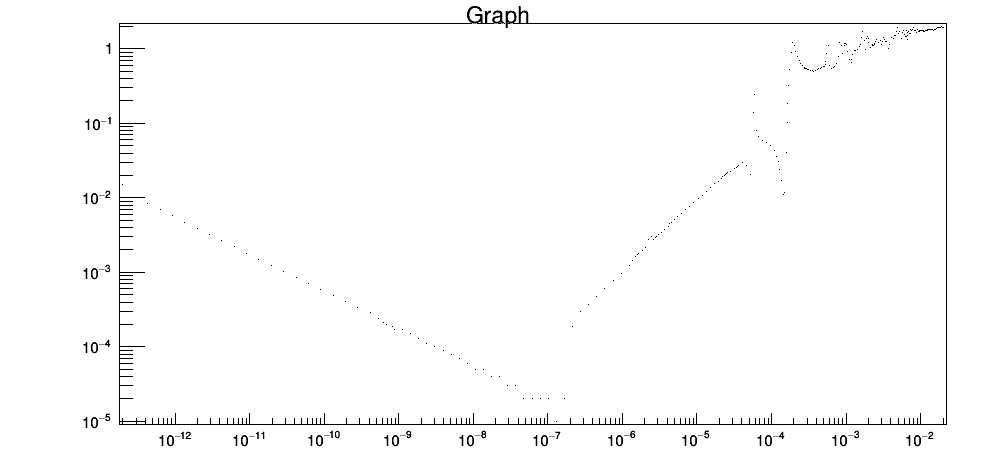

In [32]:
C = R.TCanvas('c0', '', 1000, 500)
C.SetLogx(True)
C.SetLogy(True)
g_neut_low.Draw('AP')
C.Draw()

In [42]:
h = histos[0]
nbins = h.GetNbinsX()
# area = 270.40 # VXD Layer0
area = 249623.88 # OB Layer 2
fluence = 0.0
n_total = 0.0
for i in range(nbins):
    energy = h.GetBinCenter(i+1)
    n = h.GetBinContent(i+1)
    n_total += n
    factor = 1.0
    if x_neut_low[0] < energy < x_neut_low[-1]:
        factor = g_neut_low.Eval(energy)
    elif energy < x_neut[-1]:
        factor = g_neut.Eval(energy)
    fluence += energy*factor*n
print('Fluence total:         {0:.2f} cm^-2/BX'.format(n_total/area))
print('Fluence in 1MeV n.eq.: {0:.2f} cm^-2/BX'.format(fluence/area))

Fluence total:         355.71 cm^-2/BX
Fluence in 1MeV n.eq.: 11.05 cm^-2/BX


#### Vertex Z position

In [78]:
histos = [R.TH1F('hb{0:d}'.format(i), ';|Z| position [cm];BIB Particles', 100, 0, 500) for i in range(len(pdgs))]
for i, pdg in enumerate(pdgs):
    nev = tree.Draw('abs(mcvtz)/10.0>>hb{0:d}'.format(i), 'abs(mcpdg) == {0:d}'.format(pdg), 'goff')
    print(pdg, nev)

2112 814387
22 34020016
11 2110743


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2021_05_02_bib_sim/plots/mcp_z_fluka.png has been created


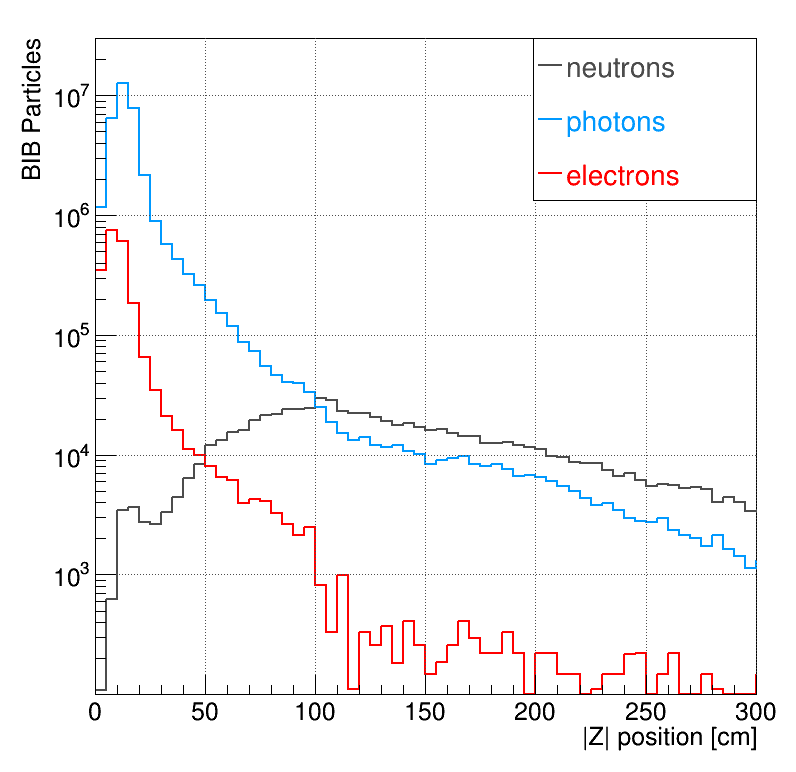

In [79]:
draw(histos, {'color': [12, R.kAzure+7, 2],
              'leg': ['neutrons', 'photons', 'electrons'],
              'y': (1e2, 3e7),
              'x': (0, 300),
              'logY': True
#              }, None)
             }, os.path.join(DIR_OUT, 'mcp_z_{0:s}.png'.format(fname)))

#### Arrival time

In [66]:
histos = [R.TH1F('hc{0:d}'.format(i), ';Arrival time [ns];BIB Particles', 250, -50, 200) for i in range(len(pdgs))]
for i, pdg in enumerate(pdgs):
    nev = tree.Draw('mctim>>hc{0:d}'.format(i), 'abs(mcpdg) == {0:d}'.format(pdg), 'goff')
    print(pdg, nev)

2112 1450042
22 31311467
11 430467


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2021_05_02_bib_sim/plots/mcp_t_mars15.png has been created


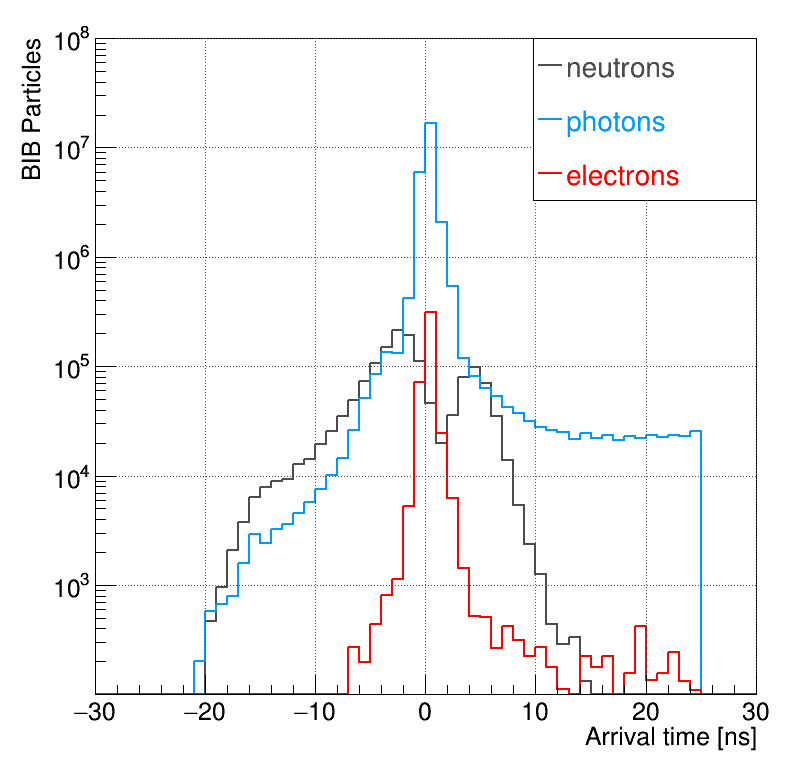

In [67]:
draw(histos, {'color': [12, R.kAzure+7, 2],
              'leg': ['neutrons', 'photons', 'electrons'],
              'y': (1e2, 1e8),
              'x': (-30, 30),
              'logY': True
#              }, None)
             }, os.path.join(DIR_OUT, 'mcp_t_{0:s}.png'.format(fname)))

### Hit density

In [228]:
DIR_IN = '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/digi/'
FILE_IN = os.path.join(DIR_IN, 'pgun_mu_1per10k_3ptBIBTrimmed_v2_j2_tuple.root')
file_in = R.TFile(FILE_IN)
tree = file_in.Get('MyLCTuple')

In [229]:
oriLayers = {1: 8, 2:8, 3: 3, 4: 7, 5: 3, 6: 4}
histos = {ori: R.TH1F('h{0:d}'.format(ori), ';Layer;Hit density [1/cm^{2}]', 33, 0, 33) for ori in oriLayers.keys()}
offset = 0
# Drawing layer ID with offset for each subdet
for ori, nLayers in oriLayers.items():
    form = 'int((int(thci0/128)%64)) + {0:d} >> h{1:d}'.format(offset, ori)
    sel = 'thori == {0:d}'.format(ori, layer)
    nev = tree.Draw(form, sel, 'goff')
    print(ori, nLayers, offset, nev)
    offset += nLayers

1 8 0 206836
2 8 8 377326
3 3 16 1123033
4 7 19 417136
5 3 26 892388
6 4 29 359689


#### Calculating densities

In [230]:
# Total areas of each layer/disk (disk from only 1 side are considered)
areas = [
    270.40, 270.40, 448.50, 448.50, 655.20, 655.20, 904.80, 904.80, # VXD barrel
    389.00, 389.00, 378.96, 378.96, 364.36, 364.36, 312.48, 312.48, # VXD endcaps
    8117.85, 22034.16, 51678.81, # IT barrel
    6639.65, 10611.59, 10078.04, 9900.19, 9307.37, 8595.98, 8299.56, # IT endcaps 
    140032.91, 194828.39, 249623.88, # OT barrel
    69545.45, 69545.45, 69545.45, 69545.45, # OT endcaps
]
# Dividing each Endcap histogram by factor 2
for ori in [2,4,6]:
    histos[ori].Scale(0.5)
# Dividing each bin of each histogram by corresponding area
offset = 0
for ori, nLayers in oriLayers.items():
    h = histos[ori]
    for layer in range(nLayers):
        iL = layer + offset
        area = areas[iL]
        nHits = h.GetBinContent(iL+1)
        h.SetBinContent(iL+1, nHits/area)
    offset += nLayers

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots/trk_hit_density_lin.png has been created


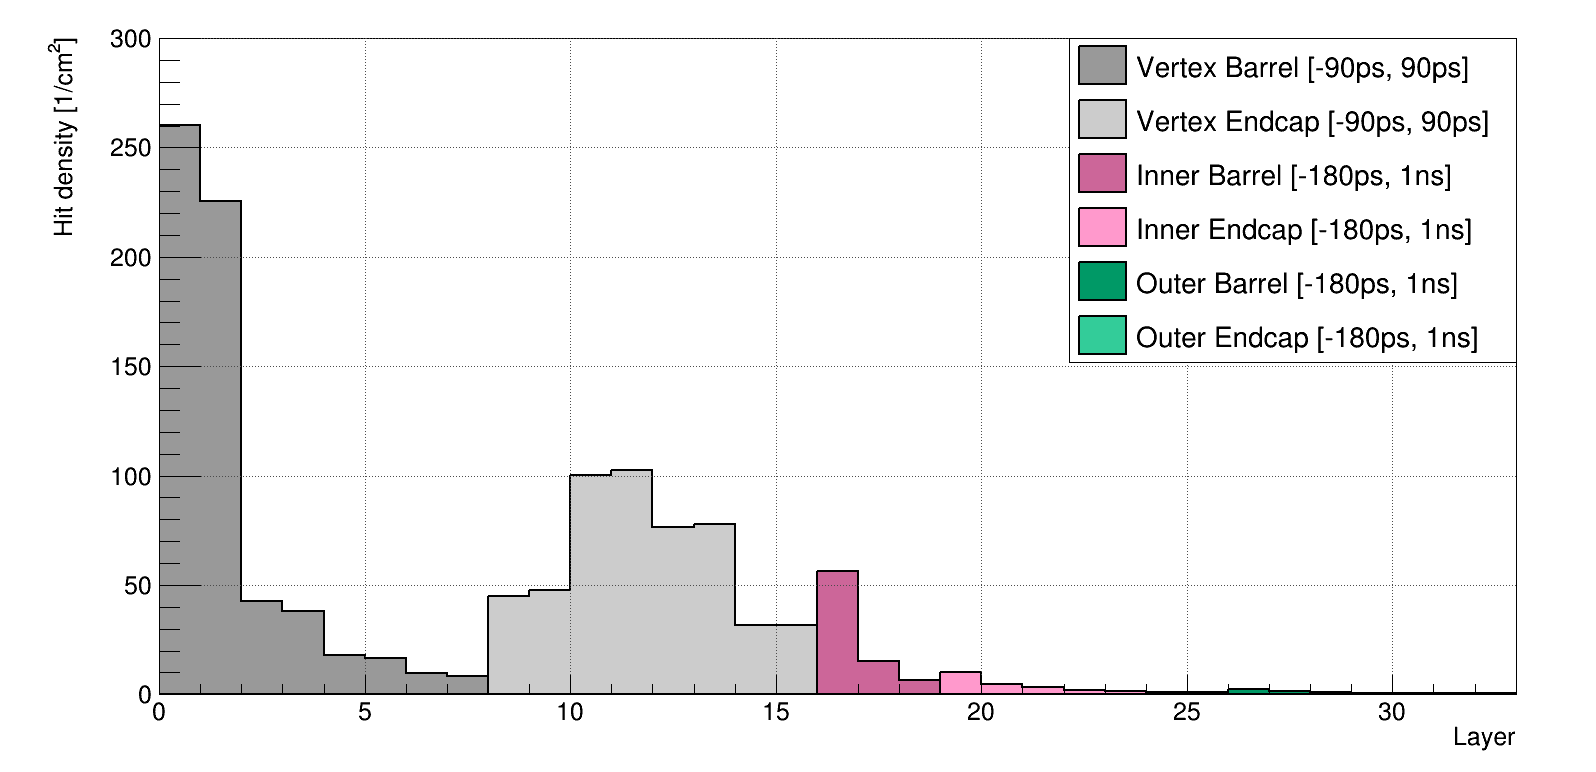

In [286]:
R.gStyle.SetPadLeftMargin(0.1)
legs = ["Vertex Barrel [-90ps, 90ps]", 
        'Vertex Endcap [-90ps, 90ps]', 
        'Inner Barrel [-180ps, 1ns]', 
        'Inner Endcap [-180ps, 1ns]', 
        'Outer Barrel [-180ps, 1ns]', 
        'Outer Endcap [-180ps, 1ns]']
DIR_OUT = '/Users/nbartosi/pdc/muoncdata/users/bartosik/clic/studies/2020_12_22_tracking/plots'
draw([h for h in histos.values()], {'color': [R.kGray+1, R.kGray, R.kPink+2, R.kPink+1, R.kTeal-6, R.kTeal-5],
              'canvas': (1600, 800),
              'leg': legs,
              'logY': False,
              'y': (0, 300),
#              }, None)
                         }, os.path.join(DIR_OUT, 'trk_hit_density_lin.png'))

In [290]:
sum([270.40, 270.40, 448.50, 448.50, 655.20, 655.20, 904.80, 904.80]) + sum([389.00, 389.00, 378.96, 378.96, 364.36, 364.36, 312.48, 312.48])*2.0

10337.0

In [314]:
(sum([8117.85, 22034.16, 51678.81]) + \
sum([6639.65, 10611.59, 10078.04, 9900.19, 9307.37, 8595.98, 8299.56]) + \
sum([140032.91, 194828.39, 249623.88]) + \
sum([69545.45, 69545.45, 69545.45, 69545.45])) / 1e4

100.79301800000002

In [313]:
250 / (1e2 / (0.025**2))

0.0015625000000000003

### Drawing pT resolution from MTD

In [126]:
c = 0.3 # speed of light m/ns
ch = 1.1 # chord
b = 3.8 # magnetic field
def pt_to_t(pt, m=0.511e-3):
    r = pt / (0.3*b)
    a = 2.0*math.asin(ch/(r*2.0))
    q = pt/m
    beta = math.sqrt(q**2/(1.0 + q**2))
    t = a*r / (c*beta)
    return t

def t_to_pt(t):
    L = c * t
    pt = 0.3*b*ch/(2.0*math.sin(L/2.0))
    return pt

In [159]:
pt_range = [0.7, 5.0]
pts = [pt_range[0]]
while pts[-1] < pt_range[1]:
    pts.append(pts[-1]+0.02)
pts.append(10000)
ts_e = []
ts_m = []
ts_uv = []
ts_ud = []
dpts = []
dt = 0.153
for pt in pts:
    t_e = pt_to_t(pt, 0.511e-3)
    t_m = pt_to_t(pt, 105.6e-3)
    ts_e.append(t_e)
    ts_m.append(t_m)
#     dpt = abs(t_to_pt(t - dt) - t_to_pt(t + dt))
#     print(pt, t, t_to_pt(t))
#     dpts.append(dpt)
    

In [184]:
pts = np.array(pts, dtype=np.float32)
pts_u = np.array(pts, dtype=np.float32)
pts_u[0] = 0.0
ts_e = np.array(ts_e, dtype=np.float32)
ts_m = np.array(ts_m, dtype=np.float32)
ts_uv = np.array([0.153]*len(pts), dtype=np.float32)
ts_ud = np.array([0.03]*len(pts), dtype=np.float32)
ts_u = np.array([ts_e[-1]]*len(pts), dtype=np.float32)
zeros = np.zeros(len(pts), dtype=np.float32)

In [218]:
g_e = R.TGraphErrors(len(pts), pts, ts_e, zeros, zeros)
g_e.SetLineWidth(2)
g_e.SetLineColor(R.kAzure+7)
g_m = R.TGraphErrors(len(pts), pts, ts_m, zeros, zeros)
g_m.SetLineWidth(2)
g_m.SetLineColor(2)
g_uv = R.TGraphErrors(len(pts), pts_u, ts_u, zeros, ts_uv)
g_uv.SetFillColor(R.kOrange-9)
g_ud = R.TGraphErrors(len(pts), pts_u, ts_u, zeros, ts_ud)
g_ud.SetFillColor(R.kRed-9)

In [219]:
C = R.TCanvas('canv', '', 800, 800)
C.SetTopMargin(0.05)
C.SetLeftMargin(0.12)
h_axis = R.TH1F('h_ax', ';Track p_{T} [GeV];TOF [ns]', 1, 0.5, 5)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv
Warning in <TROOT::Append>: Replacing existing TH1: h_ax (Potential memory leak).


Info in <TCanvas::Print>: png file /Users/nbartosi/cernbox/work/mu_collider/data/plots/cms_mtd_tof_pt.png has been created


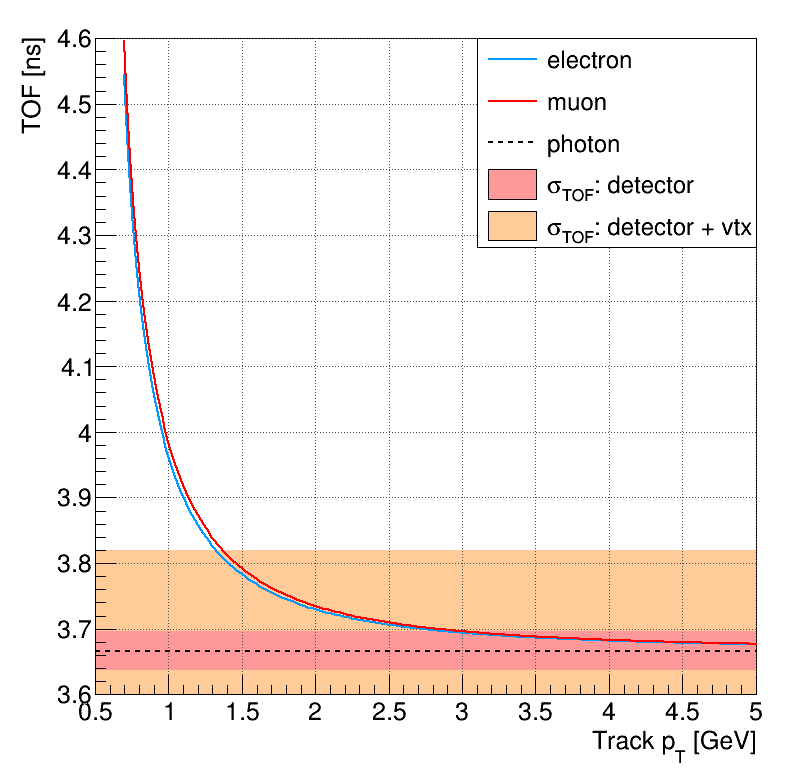

In [220]:
leg = R.TLegend(0.6, 0.68, 0.95, 0.95)
C.SetGrid(1,1)
h_axis.SetAxisRange(3.6, 4.6, 'Y')
h_axis.GetXaxis().SetTitleOffset(1.2)
h_axis.Draw('AXIS')
g_uv.Draw('3same')
g_ud.Draw('3same')
h_axis.Draw('AXIG same')
g_e.Draw('Csame')
g_m.Draw('Csame')
leg.AddEntry(g_e, 'electron', 'L')
leg.AddEntry(g_m, 'muon', 'L')
l = R.TLine(0.5, ts[-1], 5, ts[-1])
l.SetLineColor(1)
l.SetLineStyle(7)
l.SetLineWidth(2)
l.Draw('same')
leg.AddEntry(l, 'photon', 'L')
leg.AddEntry(g_ud, '#sigma_{TOF}: detector', 'F')
leg.AddEntry(g_uv, '#sigma_{TOF}: detector + vtx', 'F')
leg.Draw()
C.RedrawAxis()
C.Draw()
C.SaveAs(os.path.join('/Users/nbartosi/cernbox/work/mu_collider/data/plots', 'cms_mtd_tof_pt.png'))

In [222]:
3*3 + 0.3*4 + 6 + 3 + 2 + 2

23.2

In [223]:
64*0.9 + 64*4

313.6

In [264]:
a = 289.1 + 144 + 423 + 17
c3 = 105 + 28 + 15
c = 75 + c3
e = (a + c) * 0.25
t = a + c + e

In [265]:
t, a, c3, c, e

(1370.125, 873.1, 148, 223, 274.025)

In [257]:
n = 1e5
t = 5
r = n/t * 25e-9
print(n/t)

20000.0


In [3]:
print('VXDB',  [5 * a for a in (16, 16, 15, 15, 21, 21, 29, 29)], [26 * a for a in (13, 13, 23, 23, 24, 24, 24, 24)])
print('VXDE',  [5 * a for a in [16]*8])
print('ITB ',  [32*14*2, 32*38*2, 46*62*2], [30.1*30.1] * 3)
print('ITE ',  [26 * a for a in (4,4,3,3,3,3,3)])
print('OTB ',  [84*46*4, 84*64*4, 84*82*4], [30.1*30.1] * 3)
print('OTE ',  [48 * a for a in (3,3,3,3)])

VXDB [80, 80, 75, 75, 105, 105, 145, 145] [338, 338, 598, 598, 624, 624, 624, 624]
VXDE [80, 80, 80, 80, 80, 80, 80, 80]
ITB  [896, 2432, 5704] [906.0100000000001, 906.0100000000001, 906.0100000000001]
ITE  [104, 104, 78, 78, 78, 78, 78]
OTB  [15456, 21504, 27552] [906.0100000000001, 906.0100000000001, 906.0100000000001]
OTE  [144, 144, 144, 144]


In [8]:
2*13*3*3.1415*50e-4*2.33

2.85468105

In [10]:
12e-24/2.855e-3

4.203152364273205e-21

In [4]:
5.3e-19 *  4e12 * 1e5 *  1.7e7

3604000.0

In [13]:
7.5E-14 * 4e12

0.3

In [1]:
80*338 * 50e-3 * 2.33e-3

3.15016

In [3]:
1.05e-11 * 1.6e-10 / 3.15e-3

5.333333333333333e-19